In [42]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error

In [43]:
weather_df = pd.read_csv(r'C:\Users\ASUS\Documents\nagpur.csv\nagpur.csv', parse_dates=['date_time'], index_col='date_time')
weather_df.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,06:51 AM,...,17,14,0,48,0.0,1013,14,10,15,6
2009-01-01 01:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,06:51 AM,...,17,16,0,48,0.0,1014,14,10,21,8
2009-01-01 02:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,06:51 AM,...,16,19,0,48,0.0,1014,14,10,27,9
2009-01-01 03:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,06:51 AM,...,15,21,0,49,0.0,1015,14,10,32,10
2009-01-01 04:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,06:51 AM,...,17,18,0,47,0.0,1015,15,10,34,10


In [44]:
training_start_date = '2009-01-01'
training_end_date = '2018-12-31'
testing_start_date = '2019-01-01'
testing_end_date = '2020-01-01'

In [45]:
training_data = weather_df.loc[training_start_date:training_end_date]
testing_data = weather_df.loc[testing_start_date:testing_end_date]

In [46]:
X_train = training_data.drop(columns=['maxtempC'])  # Excluding 'maxtempC' from features
y_train = training_data['maxtempC']  # Target variable is 'maxtempC'

X_test = testing_data.drop(columns=['maxtempC'])  # Excluding 'maxtempC' from features
y_test = testing_data['maxtempC']  

# Plotting the Training and Testing data

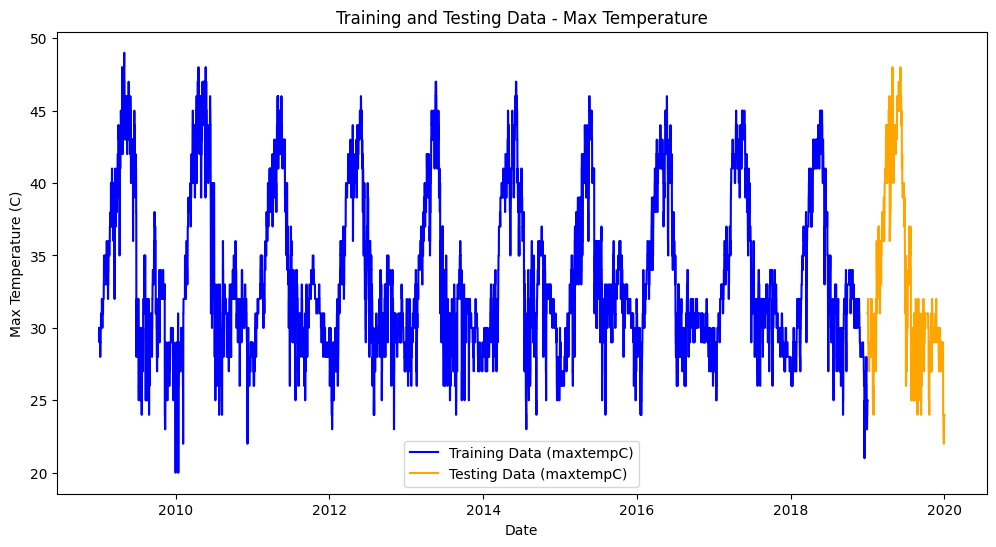

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(training_data.index, training_data['maxtempC'], label='Training Data (maxtempC)', color='blue')
plt.plot(testing_data.index, testing_data['maxtempC'], label='Testing Data (maxtempC)', color='orange')

plt.title('Training and Testing Data - Max Temperature')
plt.xlabel('Date')
plt.ylabel('Max Temperature (C)')
plt.legend()
plt.show()

In [48]:
print("Training Data:")
training_data.head()


Training Data:


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,06:51 AM,...,17,14,0,48,0.0,1013,14,10,15,6
2009-01-01 01:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,06:51 AM,...,17,16,0,48,0.0,1014,14,10,21,8
2009-01-01 02:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,06:51 AM,...,16,19,0,48,0.0,1014,14,10,27,9
2009-01-01 03:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,06:51 AM,...,15,21,0,49,0.0,1015,14,10,32,10
2009-01-01 04:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,06:51 AM,...,17,18,0,47,0.0,1015,15,10,34,10


In [49]:
print("\nTesting Data:")
testing_data.head()


Testing Data:


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,31,16,0.0,8.7,6,1,26,02:29 AM,02:15 PM,06:51 AM,...,18,18,0,29,0.0,1020,18,10,239,9
2019-01-01 01:00:00,31,16,0.0,8.7,6,1,26,02:29 AM,02:15 PM,06:51 AM,...,18,17,0,29,0.0,1020,18,10,165,8
2019-01-01 02:00:00,31,16,0.0,8.7,6,1,26,02:29 AM,02:15 PM,06:51 AM,...,17,17,0,30,0.0,1020,17,10,92,8
2019-01-01 03:00:00,31,16,0.0,8.7,6,1,26,02:29 AM,02:15 PM,06:51 AM,...,17,16,0,31,0.0,1020,17,10,18,8
2019-01-01 04:00:00,31,16,0.0,8.7,6,1,26,02:29 AM,02:15 PM,06:51 AM,...,17,15,0,32,0.0,1020,17,10,22,8


# Save the training and testing data to a CSV file

In [50]:
training_data.to_csv(r'C:\Users\ASUS\Documents\nagpur.csv\training_data.csv')
testing_data.to_csv(r'C:\Users\ASUS\Documents\nagpur.csv\testing_data.csv')

In [51]:
training_data = pd.read_csv('training_data.csv', parse_dates=['date_time'], index_col='date_time')
testing_data = pd.read_csv('testing_data.csv', parse_dates=['date_time'], index_col='date_time')

In [52]:
print("Training Data Info:")
print(training_data.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87648 entries, 2009-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   maxtempC           87648 non-null  int64  
 1   mintempC           87648 non-null  int64  
 2   totalSnow_cm       87648 non-null  float64
 3   sunHour            87648 non-null  float64
 4   uvIndex            87648 non-null  int64  
 5   uvIndex.1          87648 non-null  int64  
 6   moon_illumination  87648 non-null  int64  
 7   moonrise           87648 non-null  object 
 8   moonset            87648 non-null  object 
 9   sunrise            87648 non-null  object 
 10  sunset             87648 non-null  object 
 11  DewPointC          87648 non-null  int64  
 12  FeelsLikeC         87648 non-null  int64  
 13  HeatIndexC         87648 non-null  int64  
 14  WindChillC         87648 non-null  int64  
 15  WindGustKmph   

In [53]:
print("\nTesting Data Info:")
print(testing_data.info())


Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2019-01-01 00:00:00 to 2020-01-01 23:00:00
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   maxtempC           8784 non-null   int64  
 1   mintempC           8784 non-null   int64  
 2   totalSnow_cm       8784 non-null   float64
 3   sunHour            8784 non-null   float64
 4   uvIndex            8784 non-null   int64  
 5   uvIndex.1          8784 non-null   int64  
 6   moon_illumination  8784 non-null   int64  
 7   moonrise           8784 non-null   object 
 8   moonset            8784 non-null   object 
 9   sunrise            8784 non-null   object 
 10  sunset             8784 non-null   object 
 11  DewPointC          8784 non-null   int64  
 12  FeelsLikeC         8784 non-null   int64  
 13  HeatIndexC         8784 non-null   int64  
 14  WindChillC         8784 non-null   int64  
 15  WindGustKmph    

In [54]:
features = ['maxtempC', 'mintempC']

# Define function to train ARIMA model

In [55]:
def train_arima_model(data, feature):
    model = ARIMA(data[feature], order=(5,1,0))
    arima_model = model.fit()
    return arima_model

# Define function to perform STL decomposition and forecast

In [56]:
def forecast_stl(data, feature, steps):
    stl = STL(data[feature], seasonal=13)
    res = stl.fit()
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    # Forecast by adding the trend and seasonal components
    forecast = trend + seasonal
    
    return forecast[-steps:]

# Train and predict using ARIMA and STL models for each feature

In [57]:
for feature in features:
    # ARIMA
    arima_model = train_arima_model(training_data, feature)
    arima_forecast = arima_model.forecast(steps=len(testing_data))
    
    # STL
    stl_forecast = forecast_stl(training_data, feature, len(testing_data))
    
    # Evaluate models using Mean Squared Error (MSE)
    arima_mse = mean_squared_error(testing_data[feature], arima_forecast)
    stl_mse = mean_squared_error(testing_data[feature], stl_forecast)

In [58]:
print(f"\nMean Squared Error (MSE) for {feature}:")
print(f"ARIMA: {arima_mse}")
print(f"STL: {stl_mse}")


Mean Squared Error (MSE) for mintempC:
ARIMA: 200.7513661202186
STL: 7.600041048695886


# Visualize ARIMA forecast

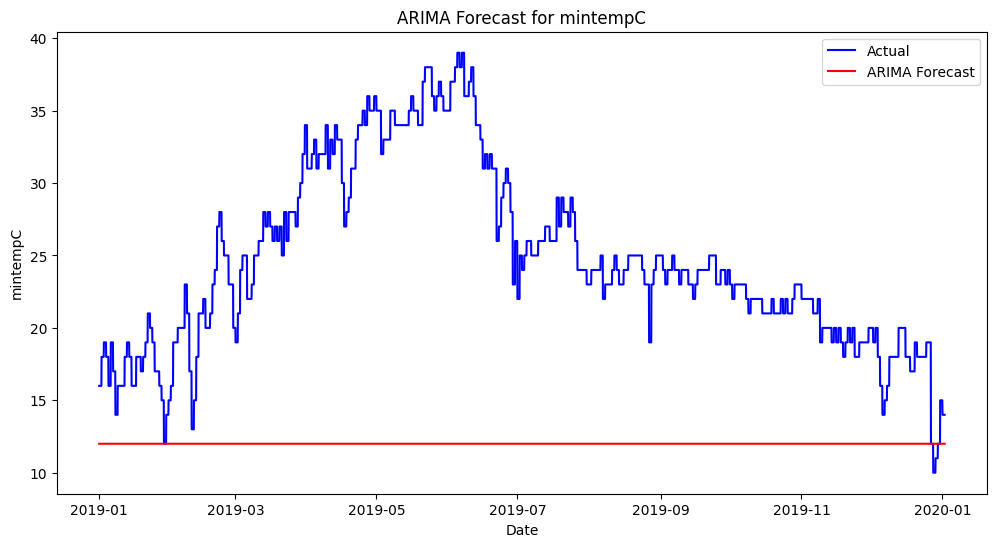

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(testing_data.index, testing_data[feature], label='Actual', color='blue')
plt.plot(testing_data.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.title(f"ARIMA Forecast for {feature}")
plt.xlabel("Date")
plt.ylabel(feature)
plt.legend()
plt.show()

# Visualize STL forecast

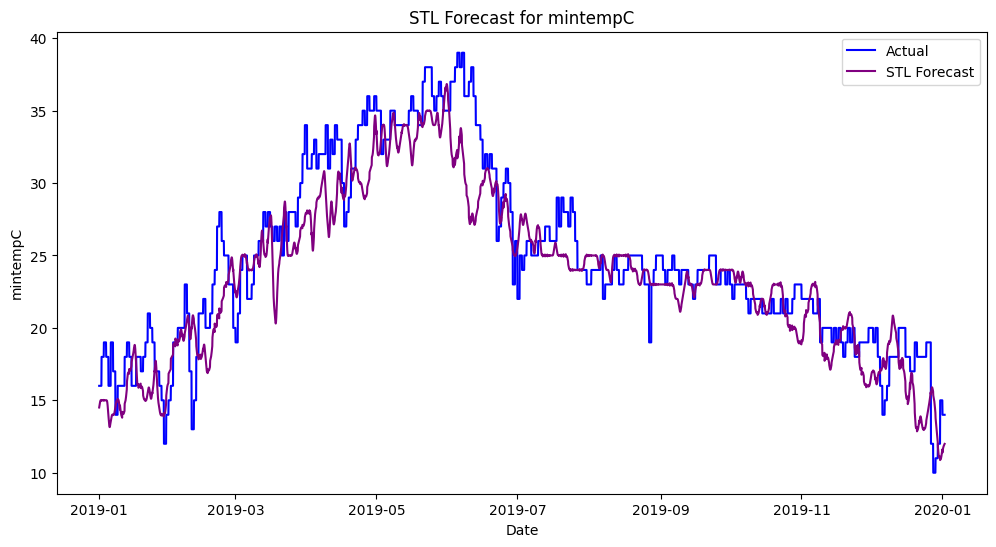

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(testing_data.index, testing_data[feature], label='Actual', color='blue')
plt.plot(testing_data.index, stl_forecast, label='STL Forecast', color='purple')
plt.title(f"STL Forecast for {feature}")
plt.xlabel("Date")
plt.ylabel(feature)
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import r2_score

# Calculate R-squared (R2) and adjusted R-squared for ARIMA model & STL model

In [62]:
arima_r2 = r2_score(testing_data[feature], arima_forecast)
n = len(testing_data[feature])
p = 1  
arima_adjusted_r2 = 1 - ((1 - arima_r2) * (n - 1) / (n - p - 1))
stl_r2 = r2_score(testing_data[feature], stl_forecast)
stl_adjusted_r2 = 1 - ((1 - stl_r2) * (n - 1) / (n - p - 1))

In [63]:
print(f"R-squared (R2) for ARIMA model: {arima_r2}")
print(f"Adjusted R-squared (adjusted R2) for ARIMA model: {arima_adjusted_r2}")
print(f"R-squared (R2) for STL model: {stl_r2}")
print(f"Adjusted R-squared (adjusted R2) for STL model: {stl_adjusted_r2}")

R-squared (R2) for ARIMA model: -4.185901489306188
Adjusted R-squared (adjusted R2) for ARIMA model: -4.1864920041649105
R-squared (R2) for STL model: 0.8036722491361882
Adjusted R-squared (adjusted R2) for STL model: 0.8036498934369325


# Visualize ARIMA and STL forecasts side by side

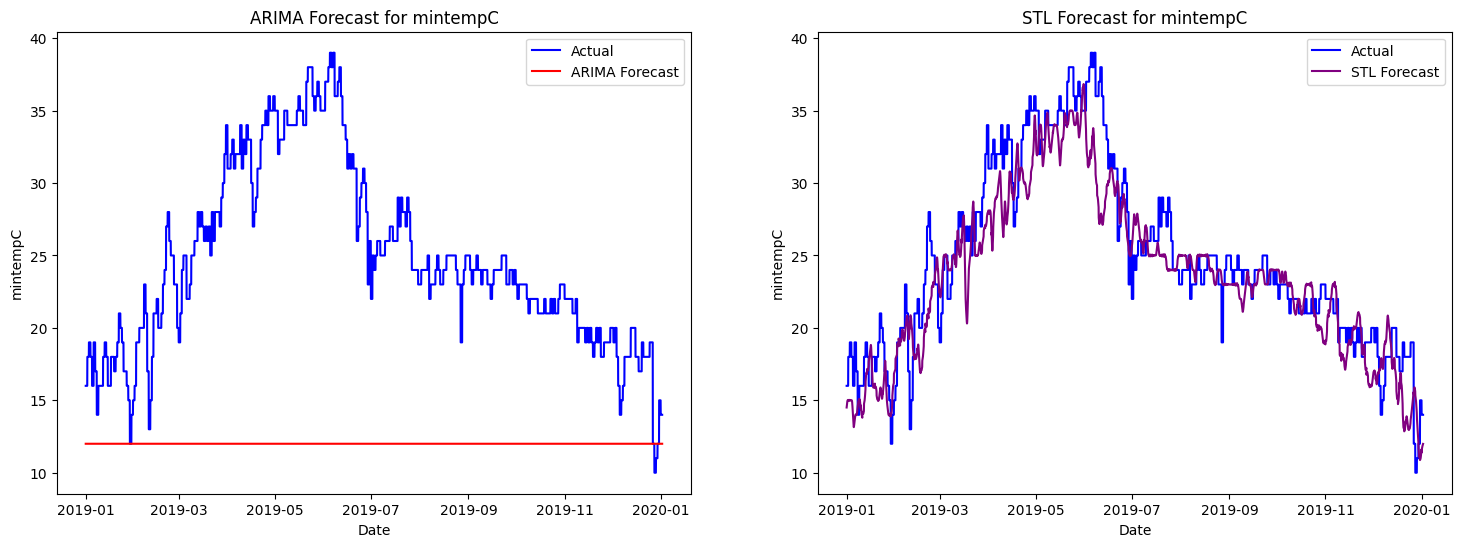

In [64]:
plt.figure(figsize=(18, 6))
# Plot ARIMA forecast
plt.subplot(1, 2, 1)
plt.plot(testing_data.index, testing_data[feature], label='Actual', color='blue')
plt.plot(testing_data.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.title(f"ARIMA Forecast for {feature}")
plt.xlabel("Date")
plt.ylabel(feature)
plt.legend()

# Plot STL forecast
plt.subplot(1, 2, 2)
plt.plot(testing_data.index, testing_data[feature], label='Actual', color='blue')
plt.plot(testing_data.index, stl_forecast, label='STL Forecast', color='purple')
plt.title(f"STL Forecast for {feature}")
plt.xlabel("Date")
plt.ylabel(feature)
plt.legend()

plt.show()